# Gaussove eliminacije i LU rastav

## 1. Ponavljanje s prethodnog predavanja

Na prethodnim predavanjima bavili smo se rješavanjem sustava
$$5x_1+x_2+4x_3=19$$
$$10x_1+4x_2+7x_3=39$$
$$-15x_1+5x_2-9x_3=-32$$
Iz Matematike 1 je poznato da ovaj sustav možemo zapisati u obliku $Ax=b.$
Nadalje, vidjeli smo da matricu $A=\begin{bmatrix}5&1&4\\ 10& 4& 7\\ -15 &5& -9\end{bmatrix}$ možemo zapisati kao produkt dviju matrica odnosno u obliku
$$A=\begin{bmatrix}5&1&4\\ 10& 4& 7\\ -15 &5& -9\end{bmatrix}=\begin{bmatrix}1&0&0\\ 2& 1& 0\\ -3 &4& 1\end{bmatrix}\begin{bmatrix}5&1&4\\ 0& 2& -1\\ 0 &0& 7\end{bmatrix}=LU$$
 

Ovdje je matrica $L$ **donjetrokutasta matrica s jedinicama na dijagonali**, elementi ispod dijagonale su odgovarajući **multiplikatori** koji odgovaraju određenoj elementarnoj transformaciji. Matrica $U$ je **gornjetrokutasta matrica**, pri tome su elementi na dijagonali matrice $U$ **pivoti**.
Do matrice $U$ došli smo dakle, elementarnim transformacijama, odnosno množeći matricu $A$ s lijeva pripadnom matricom transformacije. Na prethodnom predavanju pokazali smo postupak dobivanja matrica $M_1$ i $M_2$ za koje vrijedi jednakost
$$U=M_2M_1A \quad b^{(2)}=M_2M_1b$$
pri čemu je 
$$M_1=\begin{bmatrix}1&0&0\\ -2& 1& 0\\ 3 &0& 1\end{bmatrix}\qquad M_2=\begin{bmatrix}1&0&0\\ 0& 1& 0\\ 0 &-4& 1\end{bmatrix}.$$
Nadalje, matrica $U$ i vektor $b^{(2)}$ dani su s 
$$U=\begin{bmatrix}5&1&4\\ 0& 2& -1\\ 0 &0& 7\end{bmatrix}\qquad b^{(2)}=\begin{bmatrix}19\\ 1\\ 21 \end{bmatrix}.$$

Nadalje, uz oznaku $M=M_2 M_1$ i iz $U=MA$ vidjeli smo da je
$$L=M^{-1}=M_1^{-1}M_2^{-1}=\begin{bmatrix}1&0&0\\ 2& 1& 0\\ -3 &0& 1\end{bmatrix}\begin{bmatrix}1&0&0\\ 0& 1& 0\\ 0 &4& 1\end{bmatrix}=\begin{bmatrix}1&0&0\\ 2& 1& 0\\ -3 &4& 1\end{bmatrix}.$$

Uočimo da općenito za matrice oblika 
$$M_1=\begin{bmatrix}1&0&0\\ m_{21}& 1& 0\\ m_{31} &0& 1\end{bmatrix}\quad M_2=\begin{bmatrix}1&0&0\\ 0 & 1& 0\\ 0 &m_{32}& 1\end{bmatrix}$$
vrijedi $$M_1^{-1}=\begin{bmatrix}1&0&0\\ -m_{21}& 1& 0\\ -m_{31} &0& 1\end{bmatrix}\quad M_2^{-1}=\begin{bmatrix}1&0&0\\ 0 & 1& 0\\ 0 & -m_{32}& 1\end{bmatrix}$$
te je 
$$M=M_1^{-1}M_2^{-1}=\begin{bmatrix}1&0&0\\ -m_{21} & 1& 0\\ -m_{31} & -m_{32}& 1\end{bmatrix}.$$
Prilikom implementacije morat ćemo štedjeti memoriju računala. Pogledajmo kako efektivno možemo zapisati postupak dobivanja matrice $L$ i matrice $U$.

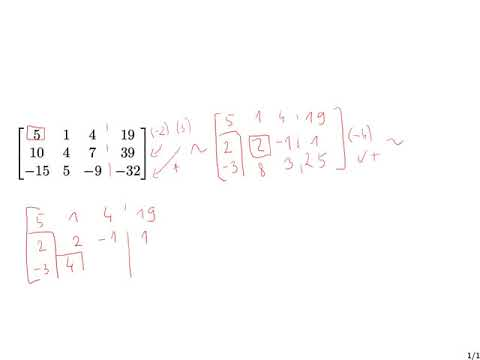

In [2]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("u6PB-5gCMRQ")
display(vid)

Link na video: https://www.youtube.com/watch?v=u6PB-5gCMRQ

# Zadatci za vježbu (obavezni za gornji dio gradiva)
1. Na  matricu $A$ iz primjera koji je objavljen u video lekciji primijenite lugui.m (objavljeno na Moodle sustavu) te potom u Matlabu odredite LU faktorizaciju ove matrice birajući redom pivote kao što smo to napravili na prethodnom predavanju (5,2,7).
2. Zadana je matrica $$A=\begin{bmatrix}a_{11}& a_{12}& a_{13}\\
a_{21}& a_{22}& a_{23}\\
a_{31}& a_{32}& a_{33}\end{bmatrix}.$$
Odredite matricu iz $\mathbf{R}^{3\times 3}$ koja množenjem matrice $A$ s lijeva vrši množenje drugog retka matrice $A$ sa $7$ i dodaje rezultat trećem retku. Svoje rješenje provjerite u Matlabu ili koristeći Python.

#  LU faktorizacija matrice i primjena na rješavanje sustava

**Definicija** *Kažemo da matrica $A\in\mathbf{R}^{n\times n}$ ima $LU$ faktorizaciju ako se može zapisati u obliku $A=LU$ gdje je $L$ donjetrokutasta matrica s jedinicama na dijagonali, a $U$ gornjetrokutasta matrica*

Pokažimo sada kako možemo $LU$ faktorizaciju matrice $A$ iskoristiti pri rješavanju sustava $Ax=b.$

Rješavamo sustav $$Ax=b$$
Ako nam je poznata dekompozicija $A=LU$ imamo
$$LUx=b$$
Neka je $Ux=y$. Rješenje početnog sustava $x$ dobijemo tako da najprije riješimo sustav $Ly=b$ te odredimo $y$, a potom $Ux=y.$ Takve je sustave lakše rješavati jes tu to sustavi s trokutastim matricama.
Objasnimo sada algoritam za $A\in \mathbf{R}^{3\times 3}.$:
1. Određivanje LU faktorizacije matrice
2. Rješavanje donjetrokutastog sustava (**supstitucije unaprijed (forward)**)
 $$\begin{bmatrix} 1& 0 &0 \\ l_{21}& 1& 0\\ l_{31}& l_{32}& 1\end{bmatrix}\begin{bmatrix}
 y_1\\ y_2\\y_3\end{bmatrix}=\begin{bmatrix}b_1\\b_2\\b_3\end{bmatrix}$$
 
3. Rješavanje gornjetrokutastog sustava (**supstitucije unatrag (backward)**)
 $$\begin{bmatrix} u_{11}& u_{12} &u_{13} \\ 0 & u_{22}& u_{23}\\ 0 & 0 & u_{33}\end{bmatrix}\begin{bmatrix}
 x_1\\ x_2\\x_3\end{bmatrix}=\begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}$$

## Rješenje sustava s početka ovog predavanja
 U našem je primjeru sustav $Ly=b$ dan s
 $$\begin{bmatrix} 1& 0 &0 \\ 2& 1& 0\\ -3& 4& 1\end{bmatrix}\begin{bmatrix}
 y_1\\ y_2\\y_3\end{bmatrix}=\begin{bmatrix}19\\39\\-32\end{bmatrix}$$ te odavde lako iščitavamo (suspstitucije unaprijed)
 $$y_1=19$$
 $$2y_1+y_2=39\Rightarrow y_2=1$$
 $$-3y_2+4y_2+y_3=-32\Rightarrow y_3=21$$

Gornje trokutasti sustav  je tada 
 $$\begin{bmatrix} 5& 1 &4 \\ 0& 2& -1\\ 0& 0& 7\end{bmatrix}\begin{bmatrix}
 x_1\\ x_2\\x_3\end{bmatrix}=\begin{bmatrix}19\\1\\21\end{bmatrix}$$ te odavde lako iščitavamo (supstitucije unatrag)
 $$x_3=3$$
 $$2x_2-x_3=1\Rightarrow x_2=2$$
 $$5x_1+x_2+4x_3=19\Rightarrow x_1=1$$


# Postupak Gaussove metode eliminacija na općenitom sustavu

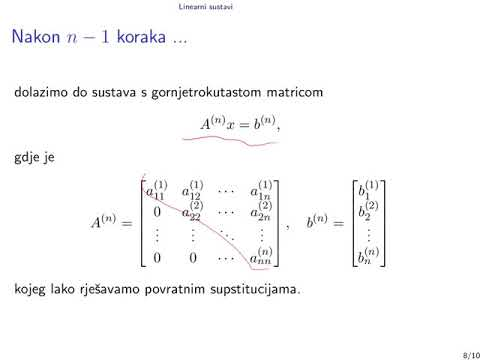

In [3]:
vid = YouTubeVideo("7OtLZSrvFDE")
display(vid)

Link na video: https://www.youtube.com/watch?v=7OtLZSrvFDE

Dakle, sada kada nam je poznata LU faktorizacija, sustav rješavamo na sljedeći način

1. Ly=b, dobijemo rješenje sustava y
2. Ux=y i dobijemo rješenje x koje je i rješenje polaznog sustava

# Pseudo kod (LU faktorizacija)

Pogledajmo sada pseudo kod rješavanja matrice, pri tome uočimo da ponovno koristimo matricu $A$ kako bismo uštedili memoriju računala kao što je to prikazano "na papiru" u prvom videu u sklopu ovog predavanja. U donji trokut spremamo multiplikatore i u u donjem trokutu u krajnjem zapisu imamo sve elemente koji su ispod dijagonale u matrici $L$. U gornjem trokutu je zapisana matrica $U$
![pseudokod](pseudokod.png)


U gornjem pseudokodu  ćemo primjerice za $n=5$ i $k=3$ računati


$i=4$, $\mu=\frac{a_{43}}{a_{33}},$ te ćemo postaviti $a_{43}=\mu$ (multiplikatore spremamo u donji trokut)


$\quad j=3, \ a_44=a_{44}-\mu a_{34}$


$\quad j=5,\ a_{45}=a_{45}-\mu a_{35}$


$i=5, \mu=\frac{a_{53}}{a_{33}},\quad a_{53}=\mu.$

Dakle na mjesto $(4,5)$ spremamo multiplikator $\mu$, dok su elementi na mjestima $(4,4)$ i $(4,5)$ su nove vrijednosti.

# Pseudo kod (Rješavanje sustava)


![sustav](sustav.png)

Uočimo da u gornjem algoritmu linije 3-7 rješavaju sustav $Ly=b$ odnosno imamo supstitucije unaprijed. Kako bismo uštedjeli na memorijskom prostoru, rezultat ćemo pospremiti u vektor $b$. 
Primjerice ako imamo sustav reda 5 
$$\begin{bmatrix}1&0&0&0&0\\
*&1&0&0&0\\
*&*&1&0&0\\
*&*&*&1&0\\
*&*&*&*&1\end{bmatrix}\begin{bmatrix}x_1\\y_2\\ y_3\\y_4\\y_5\end{bmatrix}=\begin{bmatrix}b_1\\b_2\\b_3\\b_4\\b_5\end{bmatrix}
$$
tada je $y_1=b_1$, no mi ćemo umjesto u novi vektor $y$ podatke pospremiti u vektor $b$ pa pišemo $b_1=b_1$. Za drugu jednadžbu bismo imali $y_2=b_2-a_{21}b_1$, (uočite da je u element $a_{21}$ pospremljen multiplikator) pa pišemo $b_2=b_2-a_{21}b_2$ itd.

Linije 8-14 rješavaju sustav $Ux=y$ odnosno u našoj notaciji sada $Ux=b$, te rezultat ponovno pospremamo u vektor $b$. 
Primjerice da imamo sustav reda 5 
$$\begin{bmatrix}*&*&*&*&*\\
0&*&*&*&*\\
0&0&*&*&*\\
0&0&0&*&*\\
0&0&0&0&*\end{bmatrix}\begin{bmatrix}x_1\\x_2\\ x_3\\x_4\\x_5\end{bmatrix}=\begin{bmatrix}b_1\\b_2\\b_3\\b_4\\b_5\end{bmatrix}
$$
imamo $x_5=\frac{b_5}{a_{55}}$ ali implementiramo $b_5=\frac{b_5}{a_{55}}$ itd.

### Implementacija u  Matlabu i Pythonu
Na Moodle sustavu mogu se pronaći slajdovi s implementacijom LU faktorizacije u Matlabu.

**Zadatak** Za vježbu pokušajte sami implementirati ovaj algoritam u Matlabu (ili Pythonu) da provjerite jeste li razumjeli kako algoritam funkcionira. Ako prilikom implementacije naiđete na probleme, pogledajte implementaciju zapisanu na slajdovima, a ako imate dodatnih pitanja slobofno se javite!



#  Složenost algoritma Gaussovih eliminacija

Pokažimo da je složenost algoritma Gaussovih eliminacija $O(\frac{2}{3}n^3)$

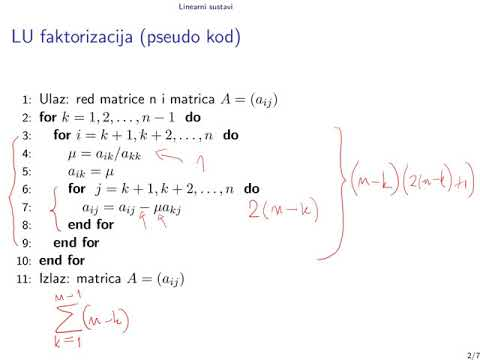

In [4]:
vid = YouTubeVideo("Dq40ZAJmGcI")
display(vid)

Link na video: https://www.youtube.com/watch?v=Dq40ZAJmGcI

Prilikom prebrojavanja računskih operacija u algoritmu za računanje $LU$ faktorizacije matrice vidjeli smo da moramo odraditi sljedeći broj operacija
$$\sum_{k=1}^{n-1}(n-k)(2(n-k)+1)$$
U gornjoj sumi možemo uvesti indeks $j=n-k$, te nam tada $k=1\Rightarrow j=n-1 $ i $k=n-1\Rightarrow j=1.$
Sada vrijedi
$$S_1=\sum_{k=1}^{n-1}(n-k)(2(n-k)+1)=\sum_{j=1}^{n-1}j(2j+1)=\sum_{j=1}^{n-1}j+2\sum_{j=1}^{n-1}j^2$$
Sada koristimo znanje iz Matematike 1 (navedene formule za ove sume smo obrađivali prvom tjednu nastave Matematike 1 uz matematičku indukciju) i dobivamo
$$S_1=\frac{n(n-1)}{2}+2\frac{(n-1)n(2n-1)}{6}=n(n-1)\frac{4n+1}{6}.$$

U algoritmu za rješvanje sustava vidjeli smo da je ukupan broj računskih operacija bio jednak S_2+S_3 gdje je
$$S_2=\sum_{k=1}^{n-1}2(n-k)=\sum_{j=1}^{n-1}2j=n(n-1)$$


$$S_3=1+\sum_{i=1}^{n-1}(2(n-i)+1)=[l=n-i]=1+\sum_{l=1}^{n-1}(2l+1)=1+2\frac{n(n-1)}{2}+n-1=1+(n-1)(n+1)$$
Uočimo da je
$$n(n-1)+(n-1)(n+1)+1=2n^2-n.$$
Dakle, ukupan broj računskih operacija potrebam da odredimo rješenje sustava $n$ jednadžbi sa $n$ nepoznanica je 
$$n(n-1)\frac{4n+1}{6}+2n^2-n=\frac{2}{3}n^3+\frac{3}{2}n^2-\frac{7}{6}n=O(\frac{2n^3}{3})$$

# PIVOTIRANJE
Razmislimo sada koji nam se **problemi** mogu javiti prilikom provođenja $LU$ faktorizacije. To su
1. **Pivotni element je 0.**


Npr. imamo matricu $A=\begin{bmatrix} 0& 1\\
1&0\end{bmatrix}$ i želimo provesti algoritam za $LU$ faktorizaciju koji smo opisali, naići ćemo na problem: *Možemo li uopće poništiti element $a_21$? Znači li to da $LU$ faktorizacija ne postoji*


**Uočimo!** Ako zamijenimo retke ove matrice "problem" iz gornjih pitanja nestaje :).

**Pitanje!** Ima li svaka regularna matrica $LU$ rastav? 

(odgovor: Nema, kao što to vidimo u primjeru za gornju matricu $A$, je rnavedena matrica je regularna. Nadalje, postoje i singularne matrice koje imaju $LU$ rastav. Primjer jedna takve matrice je $B=\begin{bmatrix}1&1\\1& 1\end{bmatrix}$)

**Propozicija** $A\in \mathbf{R}^{n\times n}$ ima $LU$ faktorizaciju ako i samo ako su sve matrice $A(1:i, 1:i)\ i=1,2,\ldots n-1$ regularne.

2.** Ako imamo malu vrijednost za pivotni element! **



I maleni pivotni element može biti problem! Obavezno proučite primjere 2.5, 2.6, 2.7 iz skripte. I ovdje je rješenje zamjena redaka!

## Parcijalno pivotiranje i permutacijske matrice

Promjenu poretka jednadžbi zadanog sustava tijekom Gaussove metode eliminacija nazivamo **parcijalno pivotiranje**. u postupku parcijalnog pivotiranja $k$-ti redak zamijenjujemo s nekim retkom većeg indeksa koji u $k$-tom stupcu ima element različit od 0.  Biramo onaj koji je po apsolutnoj vrijednosti najveći.

## Permutacijske matrice

Pročitati str. 19 i 20 u skripti i odgovoriti i razmisliti o sljedećim pitanjima

1. Jesu li permutacijske matrice regularne?
2. Što je inverz permutacijske matrice? Je li to ponovno permutacijska matrica.
3. Dobivamo li množenjem permutacijskih matrica ponovno permutacijsku matricu?
4. Neka je $A$ matrica $4$-tog reda, kako izgleda matrica $P$ za koju je
$PA=A_1$, gdje matrica $A_1$ dobivena iz matrice $A$ tako da smo joj zamijenili 1. i 4. redak.
5. Što se dešava kada matricu $A$ množimo permutacijskom matricom s desna.
6. Koja je vrijednost determinante permutacijske matrice?

**Definicija** Za matricu $A\in \mathbf{R}^{n\times n}$ faktorizacija oblika $PA=LU$, gdje je $P\in \mathbf{R}^{n\times n}$ permutacijaska matrica, L donjetrokutasta matrica s jedinicama na dijagonali te u gornje trokutasta nazivamo $PLU$ faktorizacija matrice $A$


**Teorem** Neka je $A\in \mathbf{R}^{n\times n}$, Tada postoji permutacijska matrica $P$ takoda matrica $PA$ ima $LU$ faktorizaciju odnosno vrijedu $PA=LU$. Štoviše, postoji permutacijska matrica $P$ takva da su elementi matrice $L$ po modulu manji ili jednaki $1.$